### Descente de Gradient classique / Exemple avec pandas (délimiteurs, décimales , conversion np.list to array)

In [1]:
import numpy as np
X=np.array([[1,1],[2,1]]) 
intercept=np.ones((2,1))
Xnew=np.concatenate((intercept,X),axis=1)
Y=np.array([5,7]).reshape(2,1)

iter_max=1000
eta=0.01

# Avec pandas 
#import pandas as pd
#Data=pd.read_csv('Data_sujet6.csv',delimiter=';', decimal='.')
#Data.head()
#Xnew,Y=Df.drop("y", axis=1).values,Df["y"].copy().values
#n,p=Xnew.shape
#Xnew=np.concatenate((np.ones((n,1)),Xnew),axis=1)
#p+=1
#Y=Y.reshape(n,1)

In [18]:
n,p=Xnew.shape
B=np.random.random((p,1))
j=0
grad= 2*(Xnew.transpose()).dot(Xnew@B-Y)
while np.linalg.norm(grad)>=10**-6 and j<iter_max:
    B=B-eta*grad
    j+=1
    grad= 2*(Xnew.transpose())@((Xnew@B)-Y)

print("Vecteur obtenu par Descente de Gradient : \n",B)
print("Verif MSE=:",np.round(np.linalg.norm(Y-Xnew@B),5))

Vecteur obtenu par Descente de Gradient : 
 [[1.41165137]
 [2.00070882]
 [1.58722113]]
Verif MSE=: 0.00051


### Panda Dataframe  manipulation des types string : potentiellement utile !

In [ ]:
import pandas as pd

Data2=pd.read_csv('Data_sujetReg.csv',sep=';', decimal=';')
Data2=Data2.apply(lambda s:s.str.replace('"', ""), axis=1)
Data=Data2.apply(lambda s:s.str.replace(';', "."),axis=1)
Data.astype(float)

### Descente de Gradient avec Tensorflow:  manuellement et à l'aide d'un optimizer

In [20]:
import tensorflow as tf

In [24]:
N=np.hstack((np.ones((3,1)),2*np.ones((3,1))))
N

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

In [44]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
reset_graph()

n_epochs=1000
eta=0.01
m=3
X_=np.array([[1,2,3],[2,-1,8],[3,3,1]])
X=tf.constant(np.hstack((np.ones((3,1)),X_)),dtype=tf.float32,name='X')
Y=tf.constant(np.array([3,6,9]).reshape(-1,1),dtype=tf.float32,name='Y')
theta=tf.Variable(tf.random_uniform([4,1],-1,1),name='theta')
y_pred=tf.matmul(X,theta,name='y_pred')
error=y_pred-Y
mse=tf.reduce_mean(tf.square(error),name='mse')
gradient=2/m*tf.matmul(tf.transpose(X),error)
training_op=tf.assign(theta,theta-eta*gradient)

init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        sess.run(training_op)
    best_theta=theta.eval()
        



In [47]:
best_theta

array([[-0.7528587 ],
       [ 3.0161936 ],
       [ 0.19651629],
       [ 0.11461612]], dtype=float32)

### Autodifférenciation sous tensorflow d'un noeud operation ( z=f(tf.Var),  z=tf.const @ tf.Var,... )

In [55]:
grads = tf.gradients(operation, [x, y])   # noeud gradient calculé automatiquement
with tf.Session() as sess: # chargement des noeuds, évaluation du gradient et affichage
    init.run
    print(sess.run(grads))

NameError: name 'operation' is not defined

### Optimizer : Prend un noeud opération, un taux d'apprentissage et les paramètres

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate) #optimizer
training_op = optimizer.minimize(mse) #Creer automatiquement un noeud tf.assign(theta, newtheta obtenu par un step de descente)
#optimizer.minimize(loss, var_list=[your variables] pour optimisé partiellement                
                   

### Exemple d'optimisation automatique, avec minibatch_GD et tf.placeholder

In [187]:
reset_graph()
n_epochs=1000
m,p=4,4

data=np.array([[1,2,3],[4,1,1],[2,-5,-6],[10,2,-6]])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data)
X_=np.hstack((np.ones((4,1)),X))
Y_=np.array([[8,7,-8,8]]).reshape(-1,1)

eta=tf.placeholder(dtype=tf.float32,name='eta')
Xtrain=tf.placeholder(shape=(None,p),dtype=tf.float32,name='Xtrain')
Ytrain=tf.placeholder( shape=(None,1),dtype=tf.float32,name='Ytrain')
theta = tf.Variable(tf.random_uniform([p, 1], -1.0, 1.0, seed=42), name="theta")
ypred=Xtrain@theta
mse=tf.reduce_mean(tf.square(ypred-Ytrain))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=eta)
training_op = optimizer.minimize(mse)

init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epochs in range(1,n_epochs+1):
        for j in range(m):
            ind=np.random.randint(0,m)
            sess.run(training_op,feed_dict={Xtrain: X_, Ytrain:Y_, eta:0.01 })
        if epochs % 100 == 0:
            print("Epoch", epochs, "MSE =", mse.eval(feed_dict={Xtrain: X_, Ytrain:Y_, eta:0.01})) 
    best_theta=theta.eval()
        
best_theta   

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 100 MSE = 0.003310489
Epoch 200 MSE = 0.0024482566
Epoch 300 MSE = 0.0018114157
Epoch 400 MSE = 0.0013402352
Epoch 500 MSE = 0.0009916241
Epoch 600 MSE = 0.00073373225
Epoch 700 MSE = 0.00054289843
Epoch 800 MSE = 0.00040172494
Epoch 900 MSE = 0.0002972708
Epoch 1000 MSE = 0.0002199852


array([[3.7499948],
       [2.0337503],
       [4.7247443],
       [2.3710353]], dtype=float32)

### Mini projet tensorflow: Regression logistique avec mini batch gradient descent

In [229]:
from sklearn.datasets import make_moons
m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

In [231]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]
y_moons_column_vector=y_moons.reshape(-1,1)
m,p=X_moons_with_bias.shape

In [240]:
y_moons.mean() #balanced classes

0.5

In [232]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [13]:
import matplotlib
import matplotlib.pyplot as plt

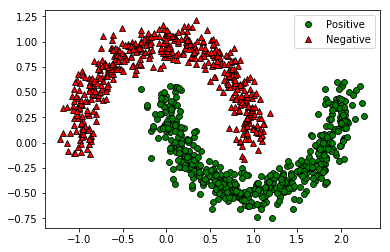

In [233]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="Positive",markeredgecolor='black',markeredgewidth=0.8)
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative",markeredgecolor='black',markeredgewidth=0.8)
plt.legend()
plt.show()

In [234]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [236]:
reset_graph()
X = tf.placeholder(tf.float32, shape=(None, 3))
y = tf.placeholder(tf.float32, shape=(None, 1))
theta = tf.Variable(tf.random_uniform([3, 1], -1.0, 1.0, seed=42))
logits = X@theta
y_proba = tf.sigmoid(logits)
loss = tf.losses.log_loss(y, y_proba) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
batch_size=10
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for j in range(int(np.ceil(m/batch_size))):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X:X_batch,y:y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})
    y_pred=(y_proba_val>=0.5)
np.mean(y_pred-y_test)

Epoch: 0 	Loss: 0.6797846
Epoch: 100 	Loss: 0.2807418
Epoch: 200 	Loss: 0.27353343
Epoch: 300 	Loss: 0.27416
Epoch: 400 	Loss: 0.27495274
Epoch: 500 	Loss: 0.27323437
Epoch: 600 	Loss: 0.27365535
Epoch: 700 	Loss: 0.27368817
Epoch: 800 	Loss: 0.27443746
Epoch: 900 	Loss: 0.27444485


0.045

In [249]:
from sklearn.metrics import confusion_matrix as cf_matrix
print('Accuracy=',1-np.mean(np.abs(y_pred-y_test)))
print('Confusion Matrix: \n',cf_matrix(y_test, y_pred))

Accuracy= 0.875
Confusion Matrix: 
 [[84 17]
 [ 8 91]]


Confusion matrix
[[84 17]
 [ 8 91]]


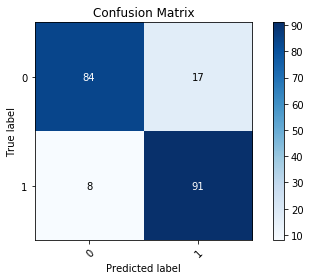

In [257]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """


    # Compute confusion matrix
    cm = cf_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    
    print('Confusion matrix')
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(y_test,y_pred)
plt.show()

- LTU : Couche d'entrée, fonction de pondération sigma, fonction échelon, une sortie. C'est un classificateur linéaire et binaire (ex= régression logistique) <br>
- PERCEPTRON = Une couche fully connected de LTU, fonction d'échelon heavside (0 si negatif, 1 sinon). C'est un classificateur linéaire multi-sorties


### KERAS

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

#### Activation function

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def heaviside(z):
    return (z >= 0).astype(z.dtype)

In [7]:
import tensorflow as tf
from tensorflow import keras as keras

In [8]:
tf.__version__

'1.13.1'

In [28]:
fashion_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [29]:
X_train_full.shape

(60000, 28, 28)

In [70]:
X_test.shape

(10000, 28, 28)

In [30]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

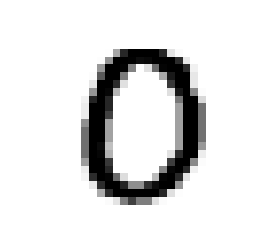

In [32]:
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(1000, activation="relu"))
model.add(keras.layers.Dense(700, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_21 (Dense)             (None, 700)               700700    
_________________________________________________________________
dense_22 (Dense)             (None, 500)               350500    
_________________________________________________________________
dense_23 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_24 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2010      
Total para

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#patience: Number of epochs with no improvement of validation error after which training will be stopped.
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
#mse_test = model.evaluate(X_test, y_test)
#model.predict(X_new)

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 40s 735us/sample - loss: 1.2290 - acc: 0.6454 - val_loss: 0.4051 - val_acc: 0.8868
Epoch 2/100
55000/55000 [==============================] - 41s 743us/sample - loss: 0.3361 - acc: 0.9024 - val_loss: 0.2558 - val_acc: 0.9276
Epoch 3/100
55000/55000 [==============================] - 46s 833us/sample - loss: 0.2437 - acc: 0.9281 - val_loss: 0.2089 - val_acc: 0.9402
Epoch 4/100
55000/55000 [==============================] - 44s 798us/sample - loss: 0.1906 - acc: 0.9443 - val_loss: 0.1653 - val_acc: 0.9510
Epoch 5/100
55000/55000 [==============================] - 46s 833us/sample - loss: 0.1544 - acc: 0.9542 - val_loss: 0.1524 - val_acc: 0.9566
Epoch 6/100
55000/55000 [==============================] - 37s 678us/sample - loss: 0.1293 - acc: 0.9616 - val_loss: 0.1223 - val_acc: 0.9666
Epoch 7/100
55000/55000 [==============================] - 40s 726us/sample - loss: 0.1098 - acc: 0

In [37]:
mse_test = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(mse_test)

10000/10000 [==============================] - 2s 196us/sample - loss: 0.0735 - acc: 0.9787
['loss', 'acc']
[0.0735447860366141, 0.9787]


In [41]:
history.history['loss']

[1.2289818787748163,
 0.3361481820886785,
 0.24370807066397235,
 0.19058021561449223,
 0.15444369955604725,
 0.12934984085532752,
 0.10981069380153309,
 0.09467873667803678,
 0.08152006162350828,
 0.07048854851722718,
 0.061761266964809464,
 0.05333907971930775,
 0.04621410681652752,
 0.04025457199351354,
 0.034317263973775235,
 0.029638962281326002,
 0.025679782439082522,
 0.021666596813195133,
 0.018222468571940605,
 0.015578358244252476,
 0.012923618016967718,
 0.010825199411335317,
 0.00921075940754434,
 0.007539569661186331,
 0.006320903885360299,
 0.005608742242010141,
 0.004877404864107005,
 0.004074402227309871,
 0.0035850410141347144,
 0.0033010373173006386,
 0.0029856474583566358,
 0.002672448506440163,
 0.0023680193391670897]

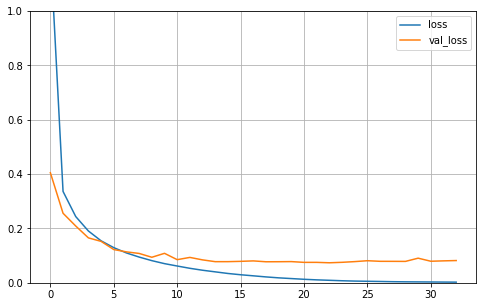

In [68]:
import pandas as pd

A=pd.DataFrame(history.history).drop(['val_acc','acc'],axis=1)
A.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")